In [38]:
import matplotlib.pyplot as plt 
import networkx as nx

In [40]:
G = nx.DiGraph()

In [41]:
for i in range(10):
    G.add_node(i)

In [48]:
nodes = list(G.nodes())

In [60]:
nd1 = nodes[:5]
nd2 = nodes[5:]

for i in range(5):
    node1 = input()
    node2 = input()
    G.add_edge(node1, node2)

8
2
7
4
8
6
5
2
4
3


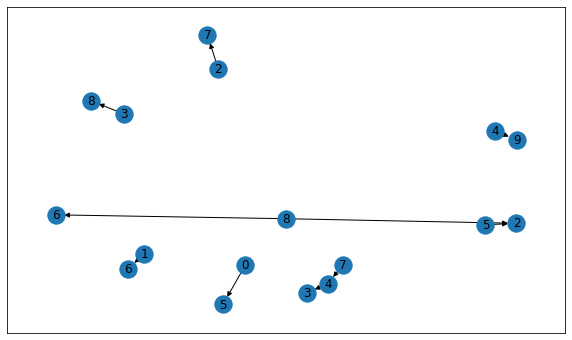

In [64]:
fig = plt.figure(figsize=(10,6))
nx.draw_networkx(G)
plt.show()